<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Tuning K-Means and Cluster Evaluation Metrics

---

![](http://scikit-learn.org/stable//_images/sphx_glr_plot_kmeans_silhouette_analysis_003.png)

## Learning Objectives

### Core
- Evaluate the results of a K-Means Clustering Analysis with
- Distinguish situations where true labels are known or unknown
  - Silhouette coefficient
  - Homogeneity score
  - Completeness score
  - V-measure
- Understand the importance of visually evaluating clusters
- Plot and interpret the silhouette coefficients



<h1>Lesson Guide<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Learning-Objectives" data-toc-modified-id="Learning-Objectives-1">Learning Objectives</a></span><ul class="toc-item"><li><span><a href="#Core" data-toc-modified-id="Core-1.1">Core</a></span></li></ul></li><li><span><a href="#Review:-K-Means-clustering" data-toc-modified-id="Review:-K-Means-clustering-2">Review: K-Means clustering</a></span><ul class="toc-item"><li><span><a href="#How-do-we-use-K-Means-end-to-end?" data-toc-modified-id="How-do-we-use-K-Means-end-to-end?-2.1">How do we use K-Means end-to-end?</a></span></li><li><span><a href="#What-are-some-problems-with-K-Means?" data-toc-modified-id="What-are-some-problems-with-K-Means?-2.2">What are some problems with K-Means?</a></span></li></ul></li><li><span><a href="#Introduction:-problems-with-K-Means" data-toc-modified-id="Introduction:-problems-with-K-Means-3">Introduction: problems with K-Means</a></span></li><li><span><a href="#Fitting-K-Means:-Inertia" data-toc-modified-id="Fitting-K-Means:-Inertia-4">Fitting K-Means: Inertia</a></span></li><li><span><a href="#Evaluating-clusters" data-toc-modified-id="Evaluating-clusters-5">Evaluating clusters</a></span></li><li><span><a href="#Visual-evaluation-of-clusters" data-toc-modified-id="Visual-evaluation-of-clusters-6">Visual evaluation of clusters</a></span></li><li><span><a href="#The-silhouette-score/coefficient" data-toc-modified-id="The-silhouette-score/coefficient-7">The silhouette score/coefficient</a></span><ul class="toc-item"><li><span><a href="#Interpreting-the-silhouette-coefficient" data-toc-modified-id="Interpreting-the-silhouette-coefficient-7.1">Interpreting the silhouette coefficient</a></span></li><li><span><a href="#Using-the-silhouette-coefficient-to-choose-the-optimal-K" data-toc-modified-id="Using-the-silhouette-coefficient-to-choose-the-optimal-K-7.2">Using the silhouette coefficient to choose the optimal K</a></span></li><li><span><a href="#Sklearn-silhouette-plotting-function" data-toc-modified-id="Sklearn-silhouette-plotting-function-7.3">Sklearn silhouette plotting function</a></span></li><li><span><a href="#Silhouette-scores-with-scikit-plot" data-toc-modified-id="Silhouette-scores-with-scikit-plot-7.4">Silhouette scores with scikit-plot</a></span></li></ul></li><li><span><a href="#Evaluating-clusters-when-the-ground-truth-is-available" data-toc-modified-id="Evaluating-clusters-when-the-ground-truth-is-available-8">Evaluating clusters when the ground truth is available</a></span><ul class="toc-item"><li><span><a href="#Completeness-score" data-toc-modified-id="Completeness-score-8.1">Completeness score</a></span></li><li><span><a href="#Homogeneity" data-toc-modified-id="Homogeneity-8.2">Homogeneity</a></span></li><li><span><a href="#V-measure-score" data-toc-modified-id="V-measure-score-8.3">V measure score</a></span></li><li><span><a href="#Report-the-scores-together" data-toc-modified-id="Report-the-scores-together-8.4">Report the scores together</a></span></li></ul></li><li><span><a href="#Additional-resources" data-toc-modified-id="Additional-resources-9">Additional resources</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

## Review: K-Means clustering
---

### How do we use K-Means end-to-end?
- Discuss how we would use this step-by-step.

### What are some problems with K-Means?
- Discuss some of the shortcomings of K-Means.
- How might we think about "good" clusters vs. "bad" clusters?

## Introduction: problems with K-Means

---

There are many problems with K-Means. One of the biggest is that it's possible to get widely different results based on initialization. Other problems include:
- Different solutions can converge with random initialization
- Not everything can be reflected as a "glob" of points
   - Irregular shapes
   - Different densities
   - Inconsistent cluster spacing
- Interpretation of results difficult without subject matter expertise
   - Evaluation is highly subjective
   - No formula for the correct number of clusters

![](http://www.aishack.in/static/img/tut/kmeans-bad-initial-guess.jpg)

## Fitting K-Means: Inertia

---

The K-Means fitting procedure is based on "Inertia", or the within-cluster sum of squares criterion. Inertia can be recognized as a measure of internal coherence.

$$ \text{Inertia } = \sum_{i=1}^k\sum_{j\in i} (x_j - \mu_i)^2$$


**Drawbacks:**
- Fitting using Inertia makes the assumption that clusters are convex and isotropic, which is not always the case. It responds poorly to elongated clusters, or manifolds with irregular shapes.
- Inertia is not a *normalized* metric: we just know that lower values are better and zero is optimal. In very high-dimensional spaces, Euclidean distances tend to become inflated (this is one instance of the so-called “curse of dimensionality”). Running a dimensionality reduction algorithm such as PCA prior to k-means clustering can alleviate this problem and speed up the computations.

![inertia2](./assets/inertia2.png)

## Evaluating clusters

---

The best evaluation of your clustering algorithm is the visual inspection of the clusters. However, it is rare that we have a dataset with few enough features that visual inspection is reasonable. We need to be able to compute metrics that measure how good given clusters fit the structure of your data.

If we were to make some basic assumptions about cluster quality, they would be:

- High intra-class similarity (within clusters)
- Low inter-class similarity (between clusters)


## Visual evaluation of clusters

---

When evaluating clusters, the best and easiest method when the data allows is to visually examine the output of the clustering algorithm. After we run the algorithm and calculate the centroids we can plot the clusters to see where the centroids are located and how well the clusters group the data. 

![](http://simplystatistics.org/wp-content/uploads/2014/02/kmeans.gif)

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, silhouette_samples, silhouette_score
from sklearn.datasets import make_blobs

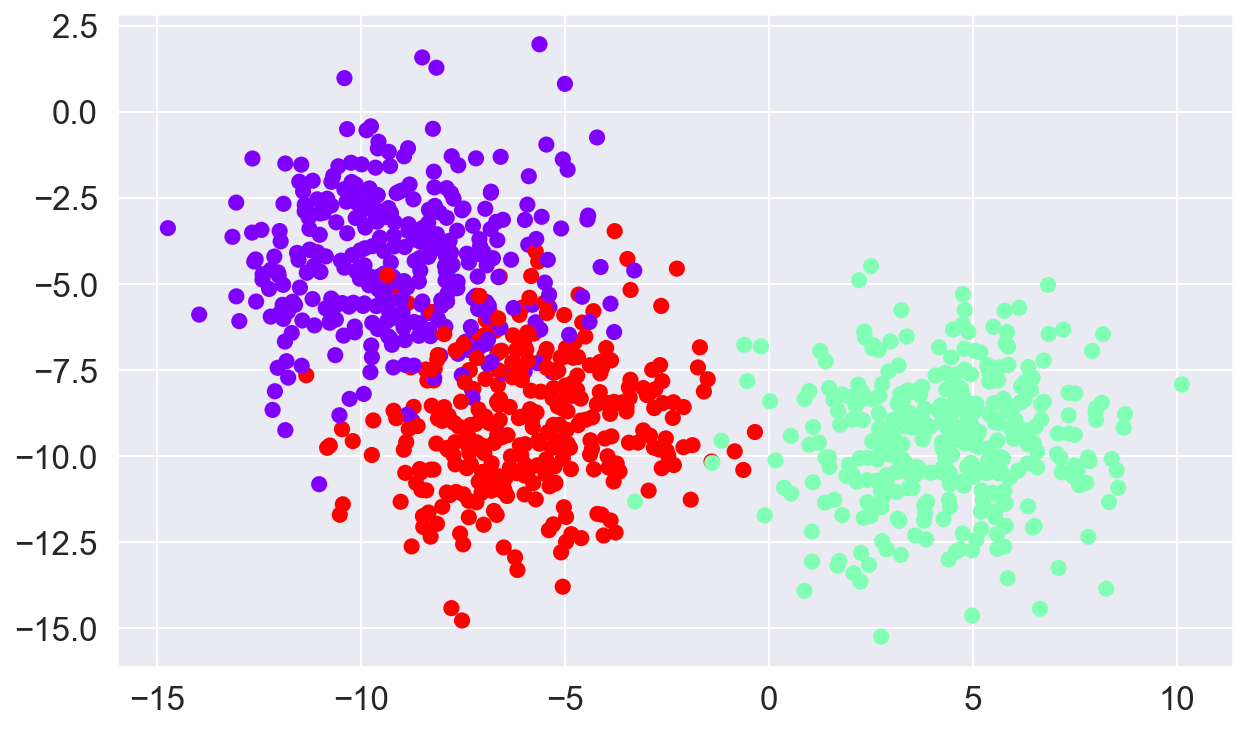

In [3]:
# Make some clusters
X, y = make_blobs(n_samples=1000,
                  n_features=2,
                  centers=3,
                  cluster_std=2,
                  shuffle=True,
                  random_state=21)

fig, ax = plt.subplots(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()
Xstd = scaler.fit_transform(X)

In [6]:
# Run k-means
k = 3
kmeans = KMeans(n_clusters=k, random_state=1)
clusters = kmeans.fit(Xstd)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

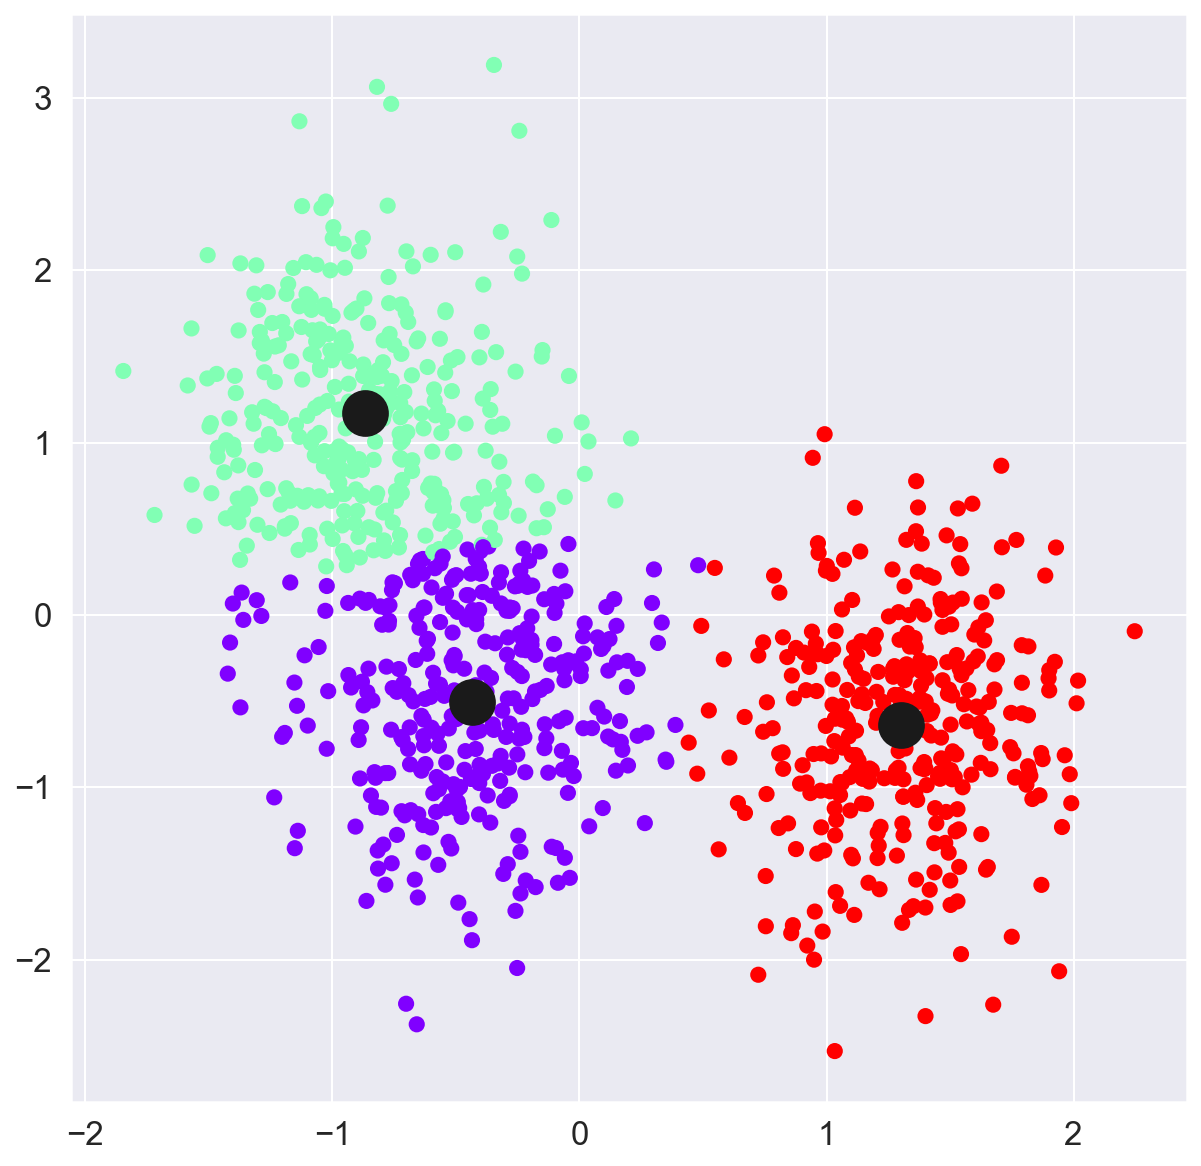

In [7]:
#Plot centroids
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Xstd[:, 0], Xstd[:, 1], c=labels, s=50, cmap='rainbow')
ax.scatter(centroids[:, 0], centroids[:, 1],
            marker='o', s=500, color='k')
plt.show()

## The silhouette score/coefficient 

---


- Ranges from minus one to one
- High if observations within the same cluster are closer to each other than to observations in another cluster

$$
s_i = \frac{b-a}{{\rm max}(a,b)}
$$

where 

- $a$: mean distance between a single data point and all other points within the same cluster
- $b$: mean distance between a single data point and all other points within the next nearest cluster
- Scikit-learn reports the average silhouette coefficient across all observations


The definition is a little involved but, intuitively, the score is based on how much closer data points are to their own clusters than to the nearest neighbor cluster.

We can calculate this score with scikit-learn:
 - `metrics.silhouette_score(X_scaled, labels, metric='euclidean')` reports the average silhouette coefficient across all observations
 - `metrics.silhouette_samples(X_scaled, labels, metric='euclidean')` reports silhouette coefficient for all observations
- https://en.wikipedia.org/wiki/Silhouette_(clustering)

![](https://snag.gy/3eCGRi.jpg)

### Interpreting the silhouette coefficient


When you calculate the silhouette score using sklearn you get out a single number. This is the average silhouette score for all of the individual observations.

In general, we would like that the within-cluster inertia are small and that the clusters are well separated. This corresponds to a value of $s$ close to +1.

- What do you think in which situations $s$ becomes small?
- When does it become negative?

### Using the silhouette coefficient to choose the optimal K

We can use the silhouette coefficient to determine an optimal K.  **It is important to keep in mind that this is still a subjective measure and not an official measure of quality.  It can help you but it's no substitute for knowing your data**.  

Visually inspecting your data and evaluating how the silhouette coefficient changes across numbers of clusters can give you a rough sense of the quality for K clusters.

In [8]:
silhouette_score(X, labels)

0.5110652608682895

### Sklearn silhouette plotting function

Below is some code taken from the sklearn website that helps visualize the silhouette score across different numbers of clusters.

The vertical line indicates the average silhouette score across all observations. The individual scores are plotted in sorted, colored sections for each cluster.

In [9]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

For n_clusters = 2 the average silhouette_score is: 0.4744044543534893


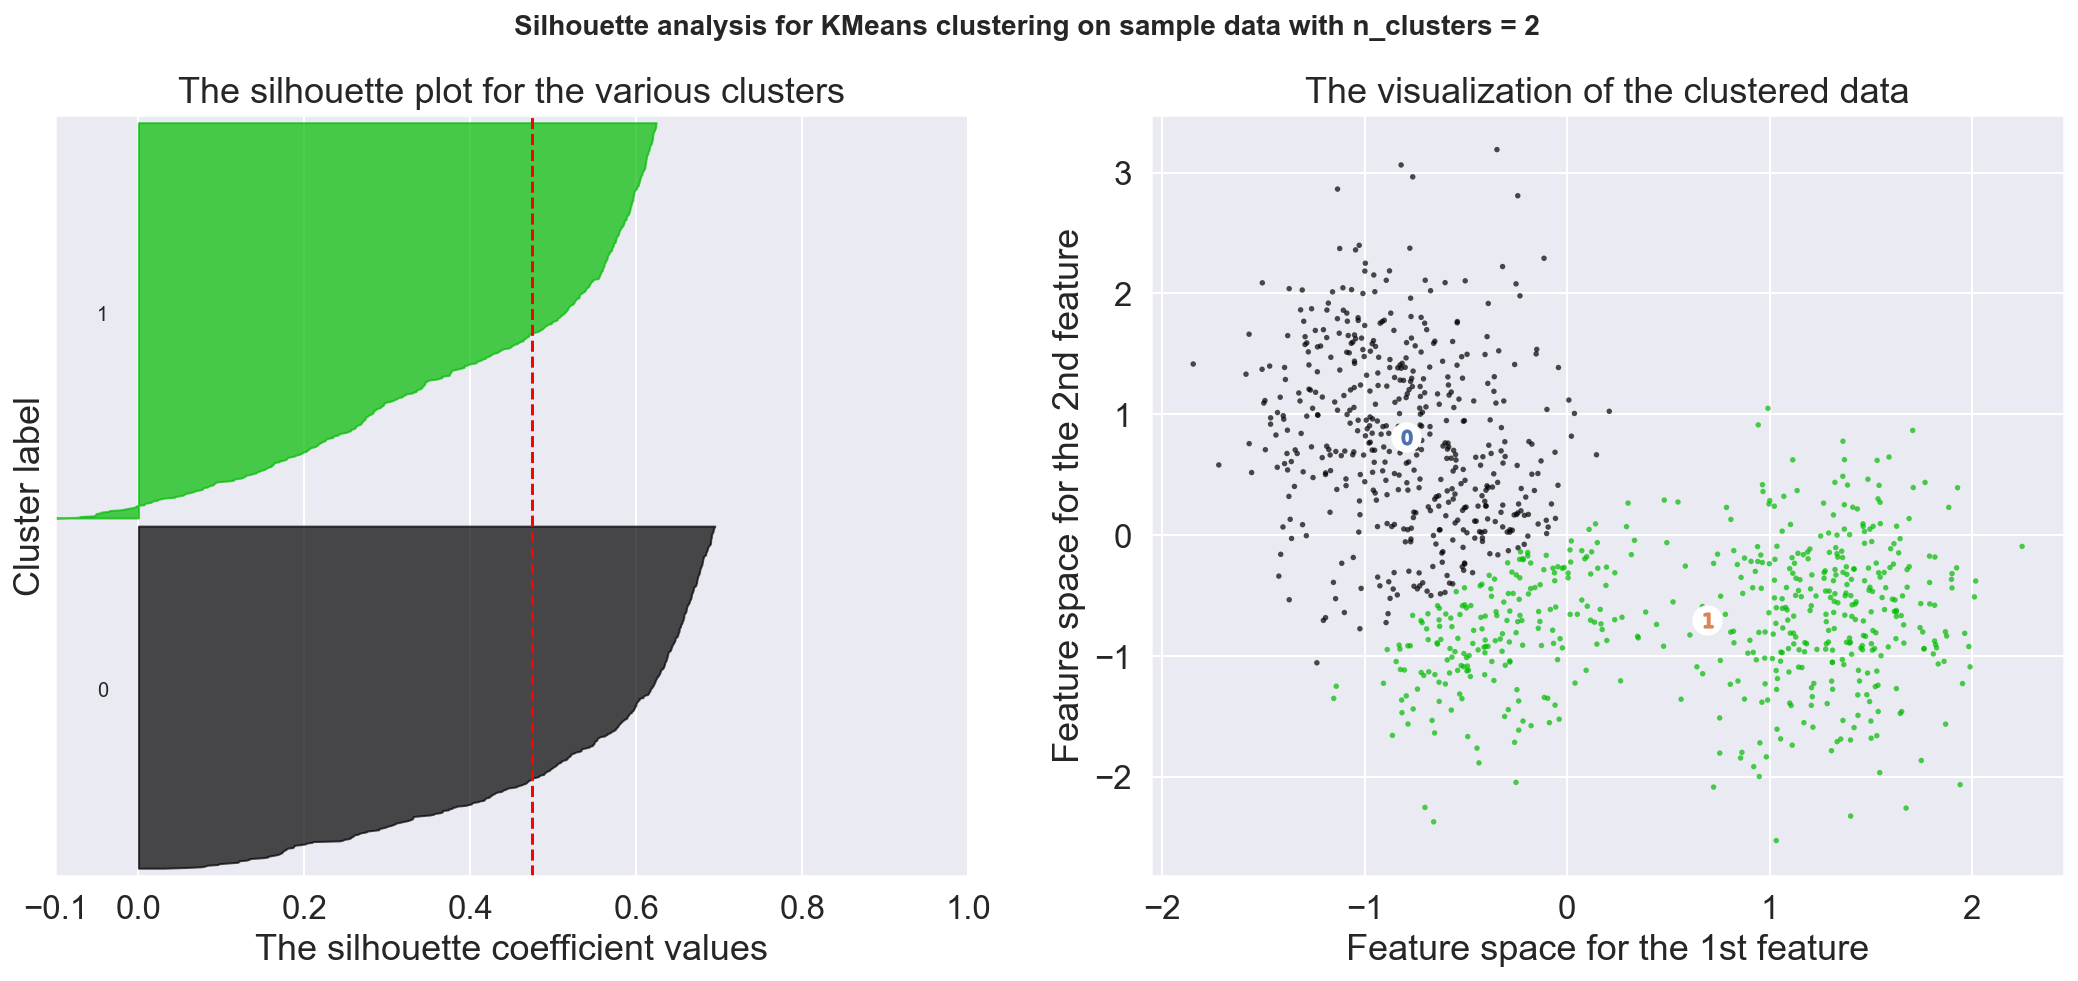

For n_clusters = 3 the average silhouette_score is: 0.5072636055004682


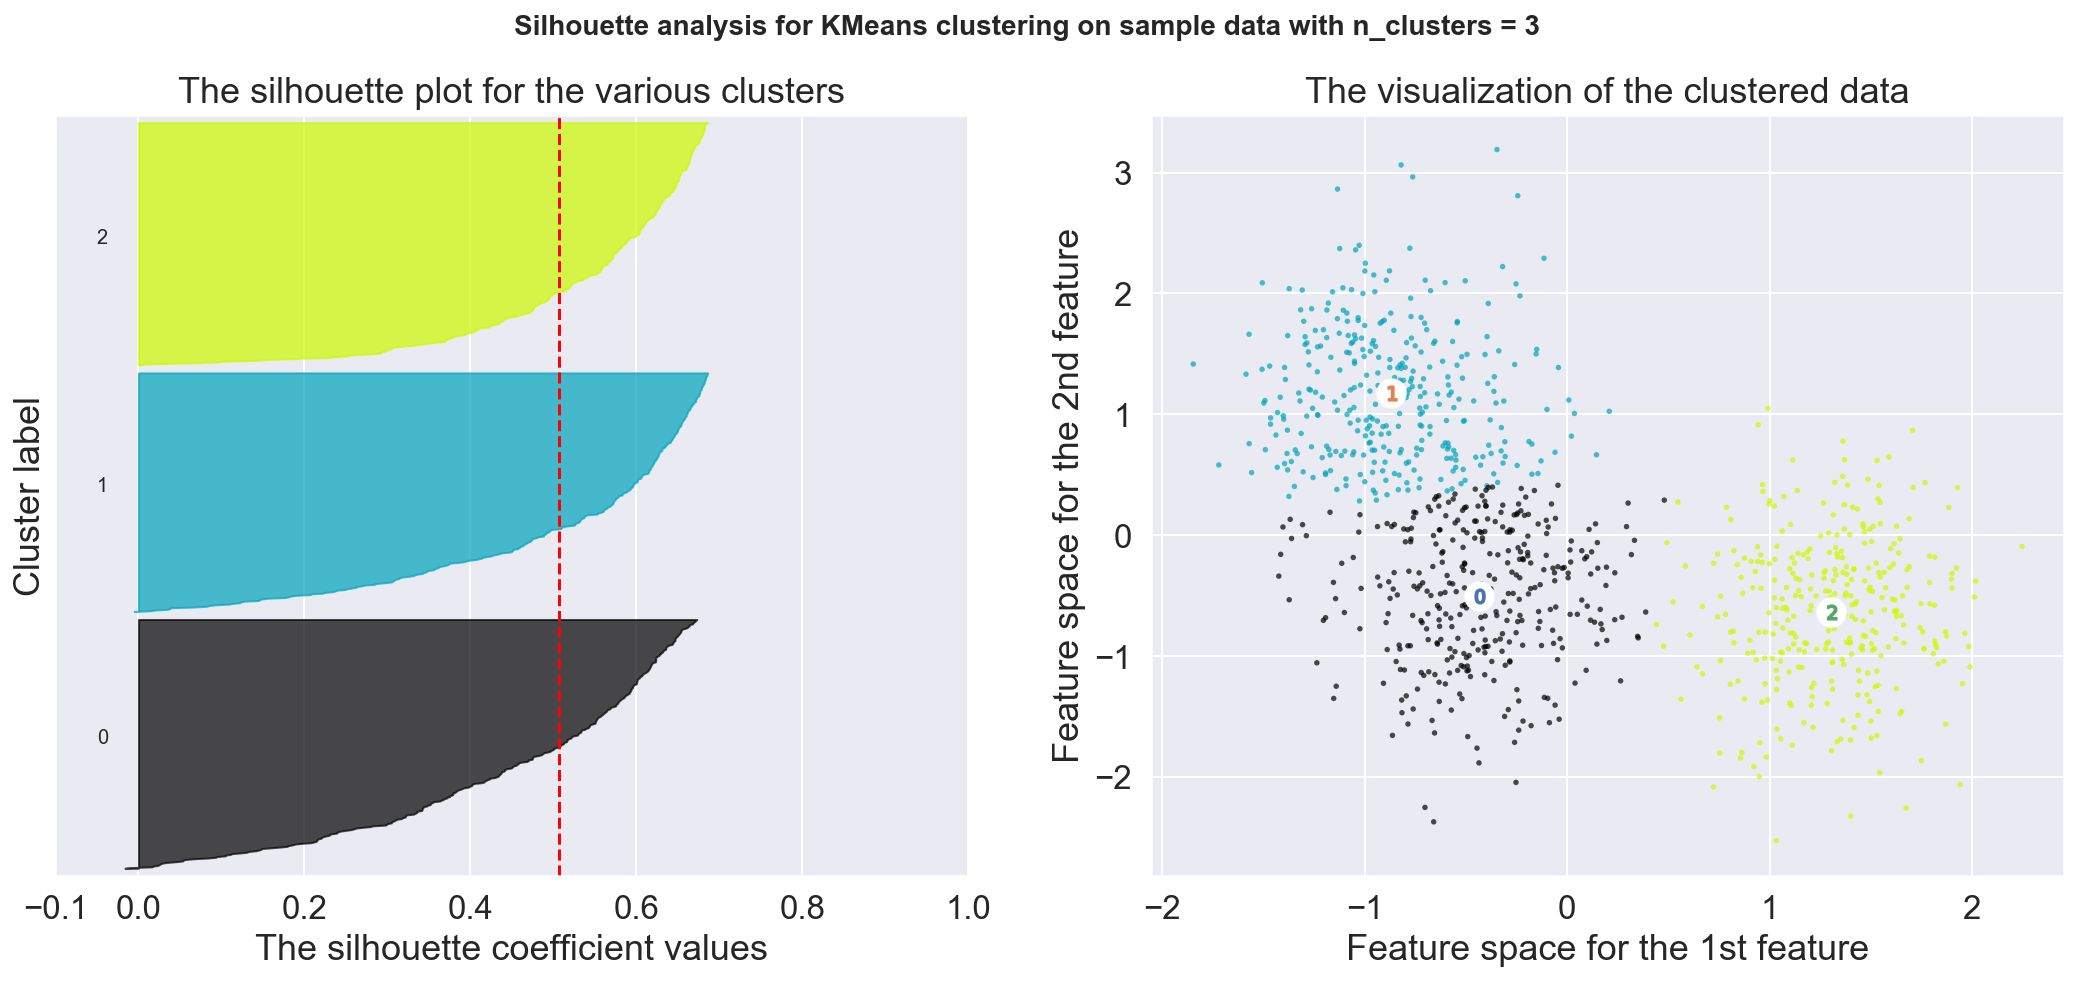

For n_clusters = 4 the average silhouette_score is: 0.4477087376001814


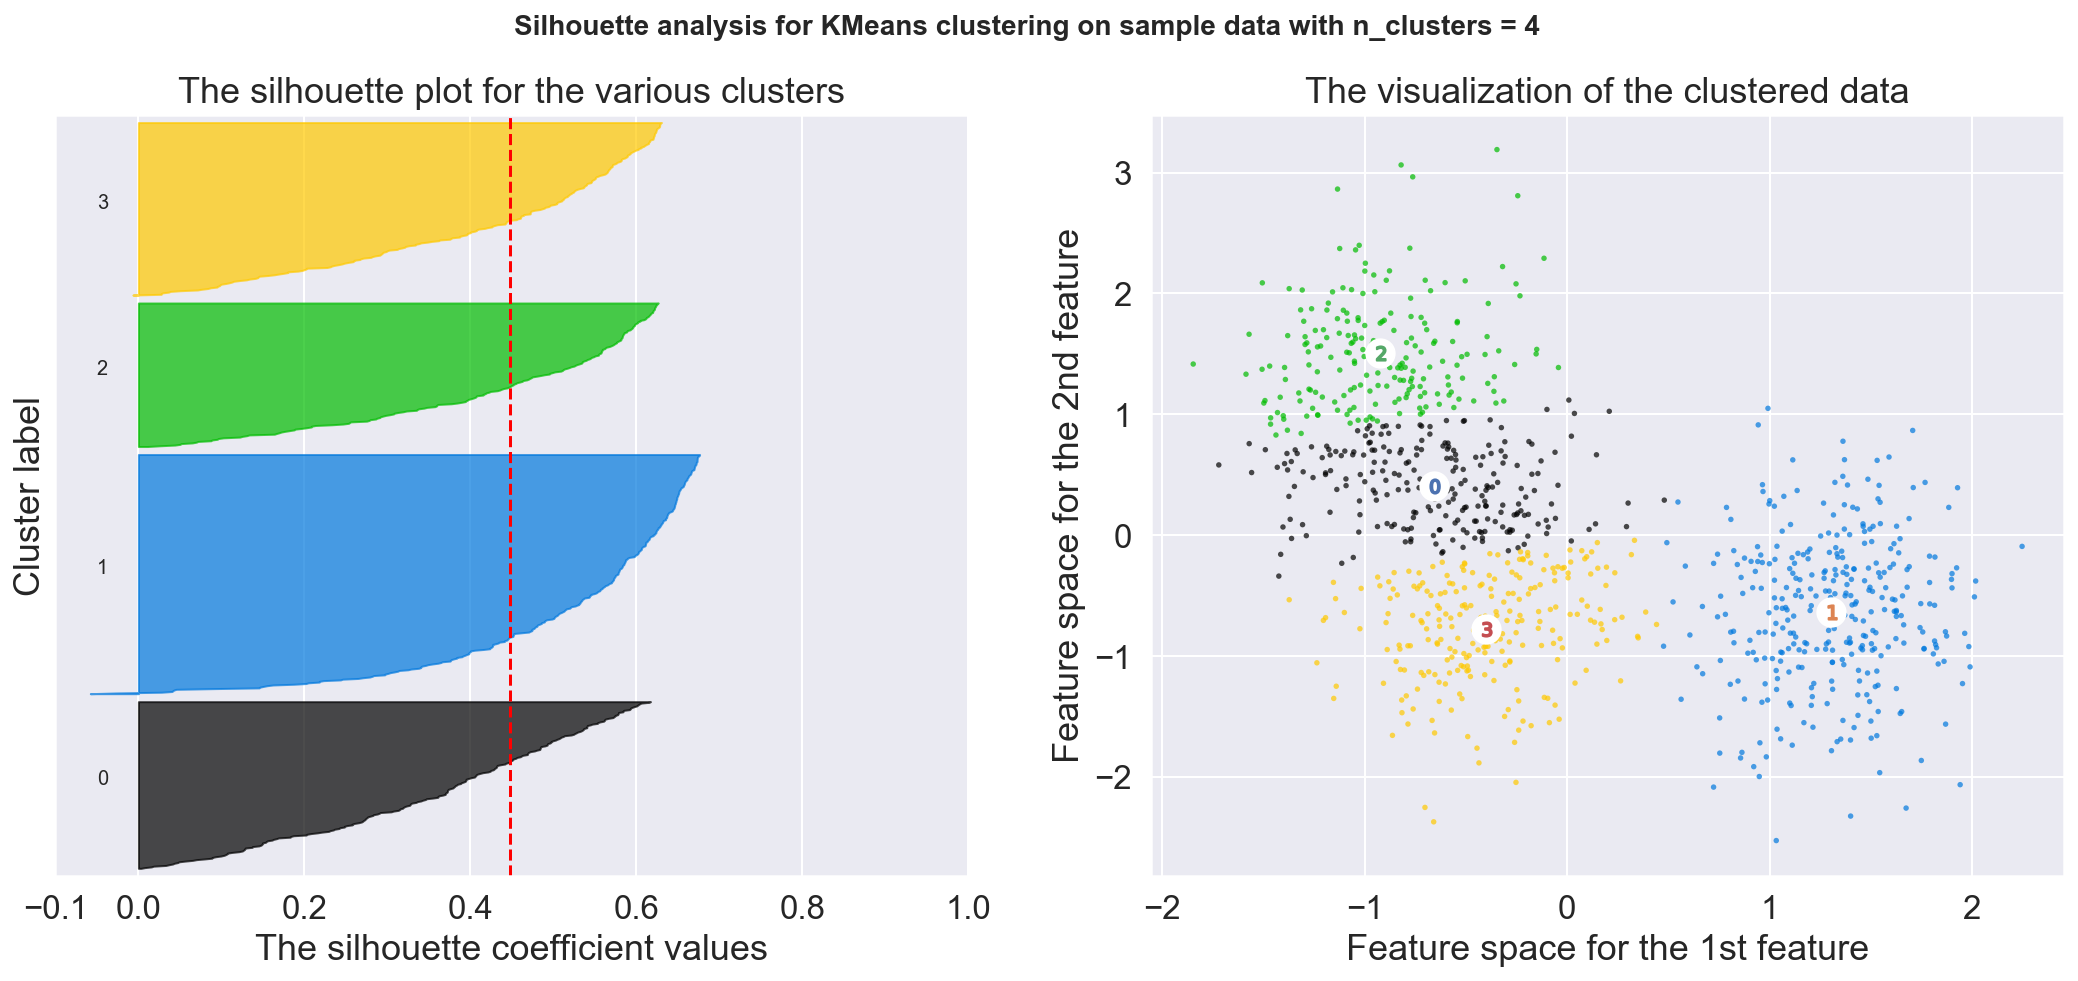

For n_clusters = 5 the average silhouette_score is: 0.4063539094266085


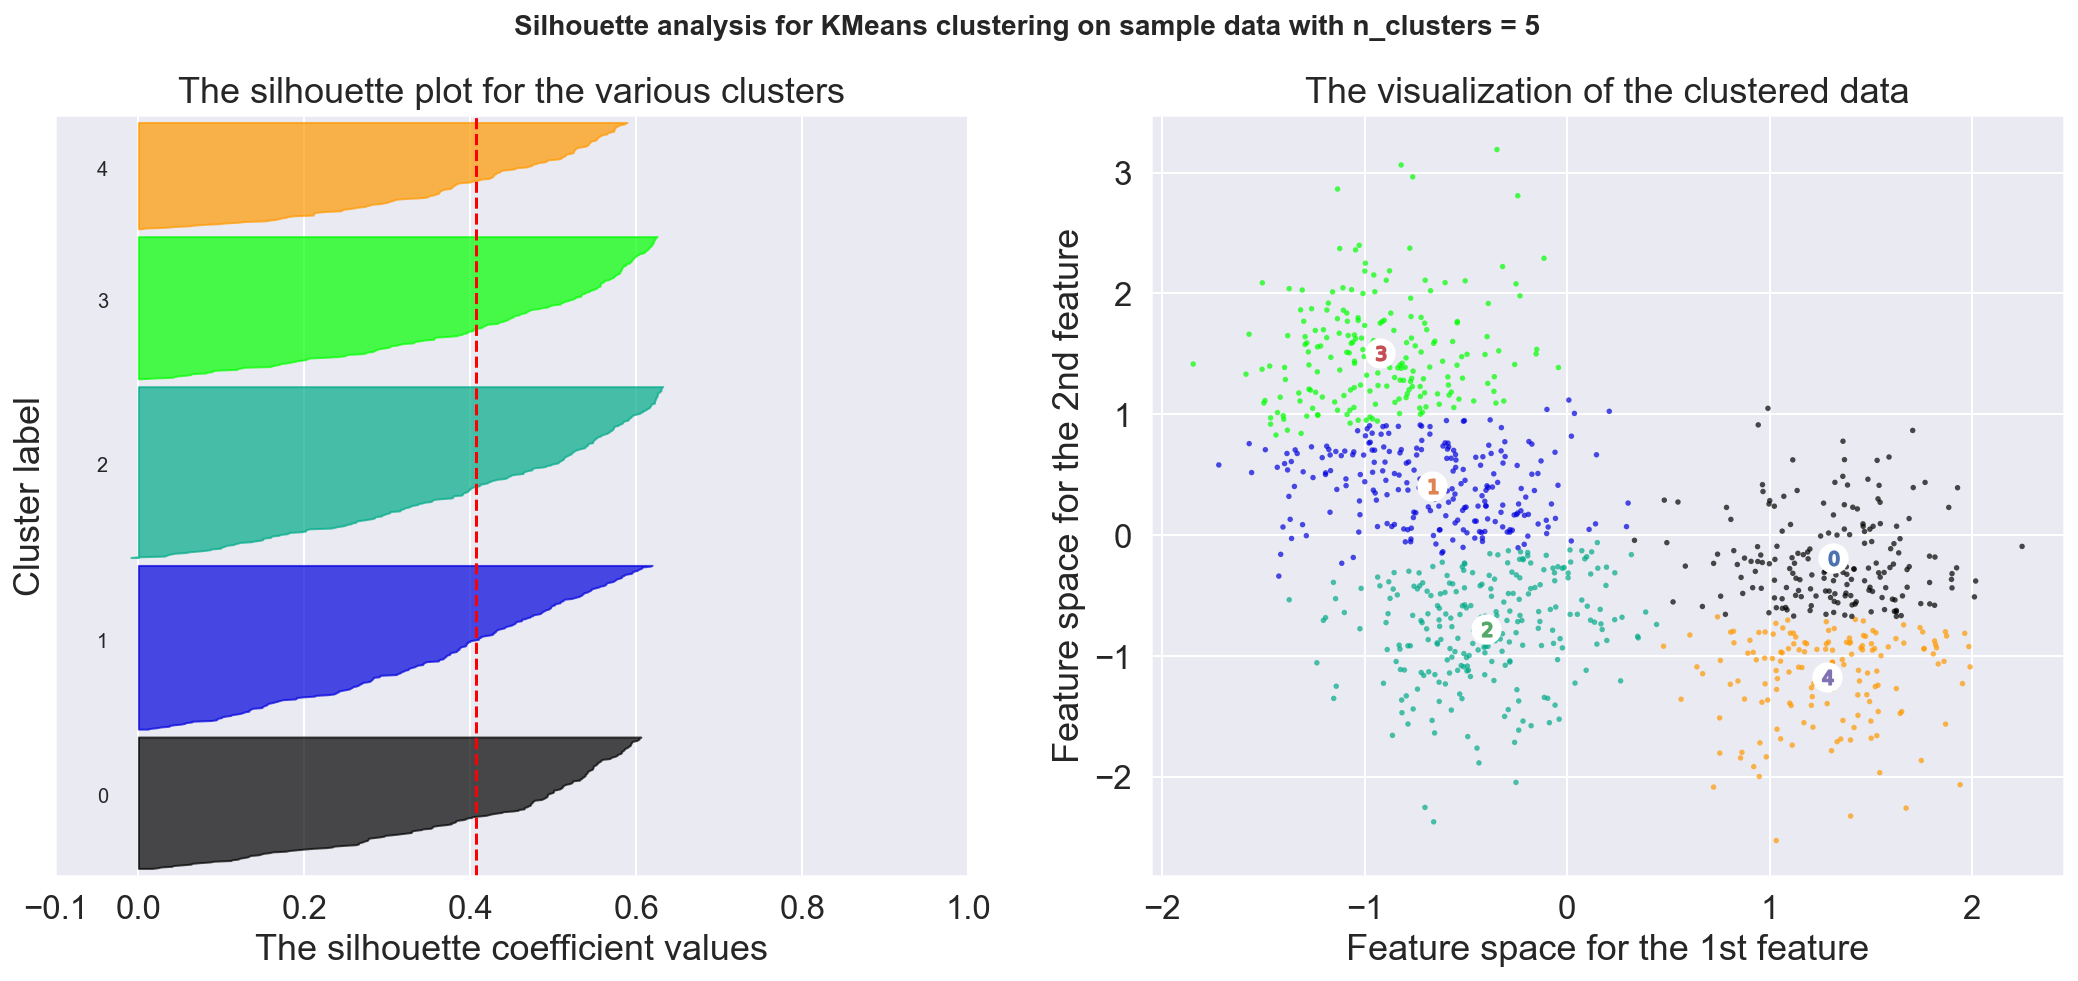

For n_clusters = 6 the average silhouette_score is: 0.37826873233877534


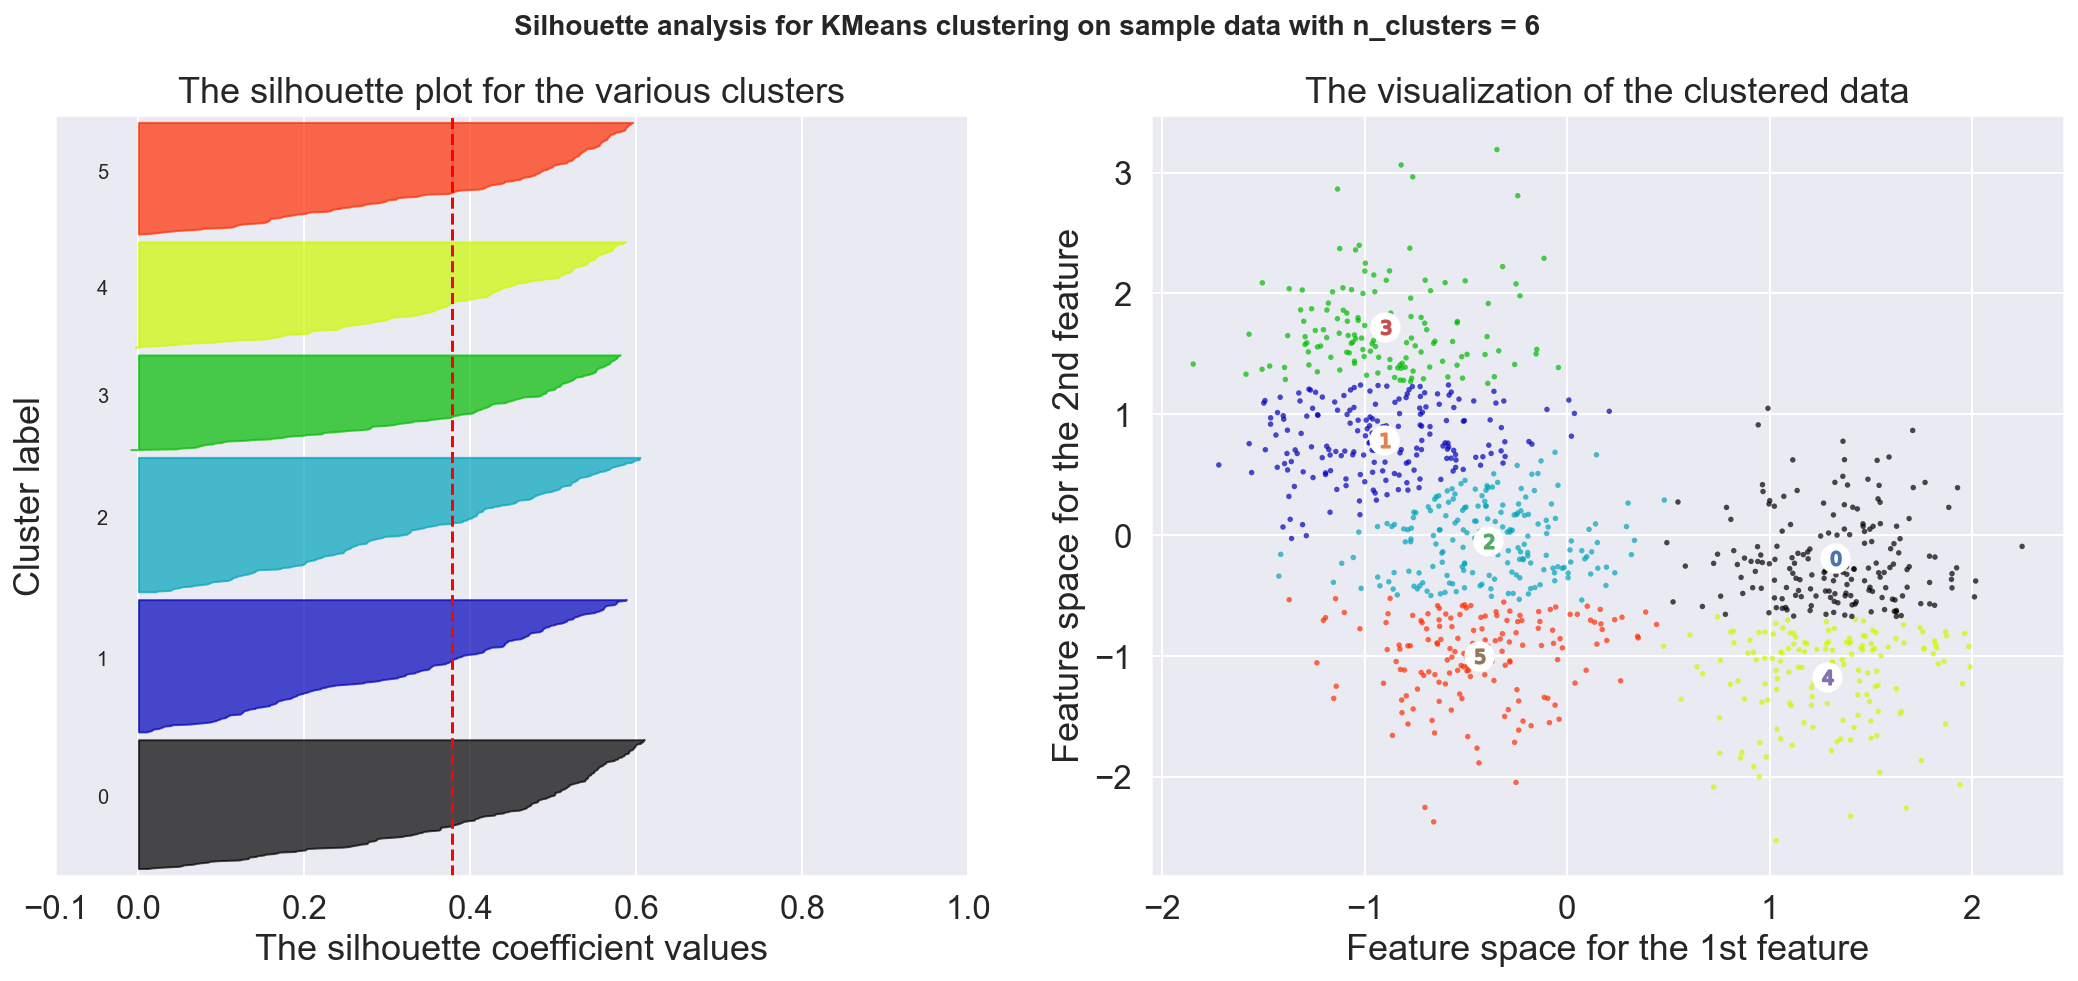

In [10]:
X = Xstd
range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "the average silhouette_score is:", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhoutte score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()

In [11]:
cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)

array([[1.        , 0.17647059, 0.        , 1.        ],
       [0.        , 0.64446667, 0.73336667, 1.        ],
       [0.79996667, 0.97776667, 0.        , 1.        ],
       ...,
       [0.        , 0.73853137, 0.        , 1.        ],
       [0.        , 0.        , 0.72552353, 1.        ],
       [0.        , 0.        , 0.72552353, 1.        ]])

### Silhouette scores with scikit-plot

Of course, all that is implemented in a nice function. Just use scikit-plot.

In [12]:
from scikitplot.metrics import plot_silhouette

number of clusters:  2


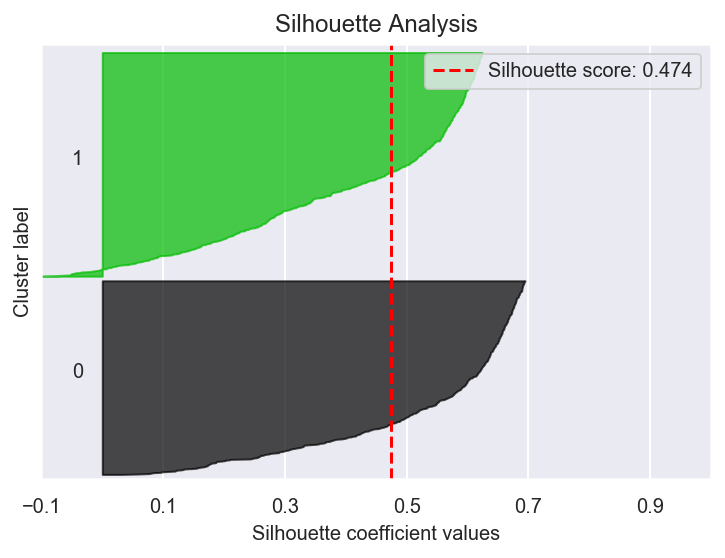

number of clusters:  3


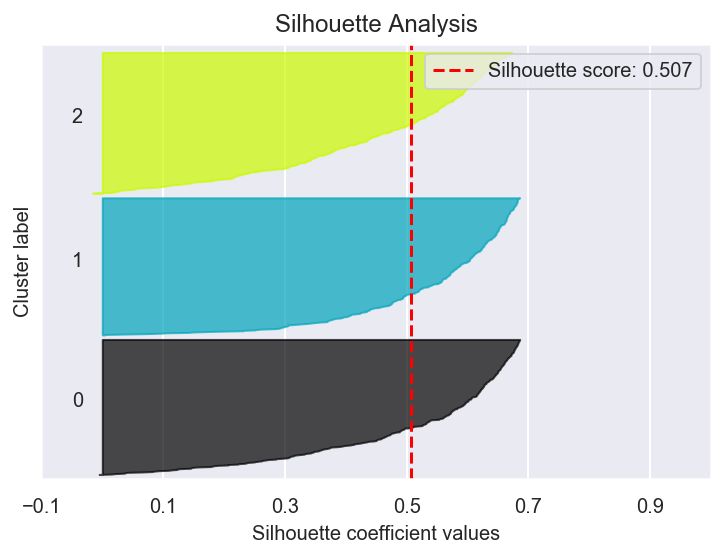

number of clusters:  4


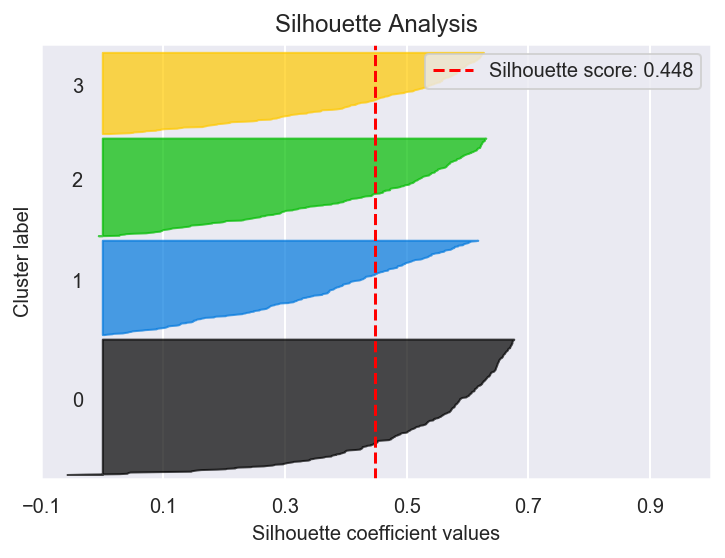

number of clusters:  5


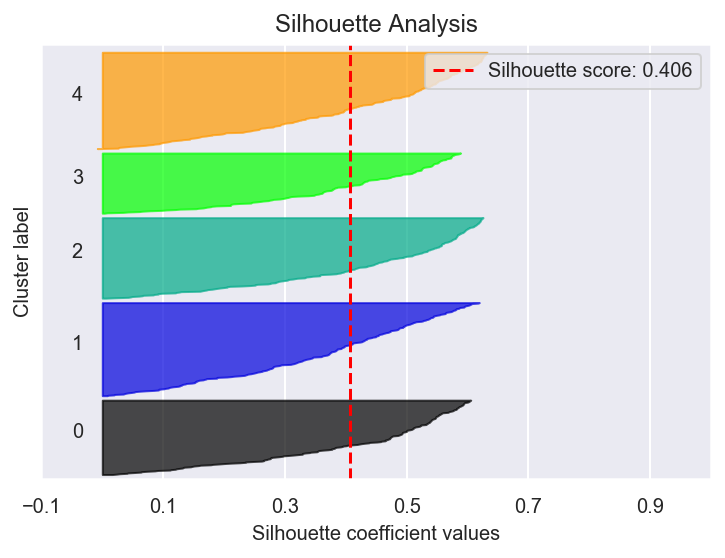

In [13]:
for k in range(2, 6):
    print('number of clusters: ', k)
    model = KMeans(n_clusters=k)
    model.fit(X)
    labels = model.labels_
    plot_silhouette(X, labels)
    plt.show()

## Evaluating clusters when the ground truth is available

---

The silhouette score is a particularly useful metric in that it does not require us to have the true labels for the clusters (which is most often the case if we need to do clustering to begin with!).

When the true labels are available, there are other methods we can use to evaluate the performance of our clustering algorithm and choice of $k$:
- Completeness Score 
- Homogeneity 
- V Measure Score 

### Completeness score

**Completeness indicates that all members of a given class are assigned to the same cluster.**
- A clustering result satisfies completeness if all the data points that are members of a given class are elements of the same cluster. 
- Ranges between 0.0 and 1.0. 
- 1.0 stands for perfectly complete labeling.

You can calculate completeness score using scikit-learn with:
```python
from sklearn.metrics import completeness_score
completeness_score(true_clusters, predicted_clusters)
```


In [14]:
from sklearn.metrics import completeness_score
completeness_score(y, labels)

0.5372472686786517

### Homogeneity

**Homogeneity indicates each cluster contains only members of a single class.**
- A clustering result satisfies homogeneity if all of its clusters contain only data points which are members of a single class. 
- Ranges between 0.0 and 1.0. 
- 1.0 stands for perfectly homogeneous labeling.

You can calculate the homogeneity using scikit-learn:
```python
from sklearn.metrics import homogeneity_score
homogeneity_score(true_clusters, predicted_clusters)
```


In [15]:
from sklearn.metrics import homogeneity_score
homogeneity_score(y, labels)

0.7805276483015255

### V measure score

The V measure score is a combination of the homogeneity and completeness metrics:

$$ V = \frac{2 \cdot \text{homogeneity} \cdot \text{completeness}}{\text{homogeneity} + \text{completeness}} $$

In scikit-learn:
```python
from sklearn.metrics import v_measure_score
v_measure_score(true_clusters, predicted_clusters)
```


In [16]:
from sklearn.metrics import v_measure_score
v_measure_score(y, labels)

0.6364309136178129

### Report the scores together

In [17]:
from sklearn.metrics import homogeneity_completeness_v_measure
homogeneity_completeness_v_measure(y, labels)

(0.7805276483015255, 0.5372472686786517, 0.6364309136178129)

## Additional resources

---

- [SKLearn Clustering](http://scikit-learn.org/stable/modules/clustering.html)
- [SKLearn K-Means](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)
- [SKLearn Silhouette Score](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html)